In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

+ **建立一棵树**

**1. 导入数据**

In [3]:
wine = load_wine()

**2. 描述数据集**

In [5]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [8]:
wine.data.shape

(178, 13)

In [7]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [11]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
import pandas as pd

In [14]:
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


**3. 划分数据集**

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [4]:
Xtrain.shape

(124, 13)

In [5]:
Xtest.shape

(54, 13)

In [19]:
Ytrain

array([2, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1,
       0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1,
       2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1])

In [20]:
Ytest

array([2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 1, 0, 0, 2, 1, 1, 1, 0, 0])

**4. 建立模型**

决策树在运行时并不会把所有的特征都放进去，而是每次都选择了一部分特征，因此同一个数据集，用同一个模型运行，出现的结果会不稳定，需要设置好状态

splitter也是同样的作用，用于控制特征的随机性

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=0
                                 # ,splitter='best'
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)  # 返回预测的准确度

score

0.9259259259259259

**5.画出决策树**

In [6]:
feature_name = ['酒精','苹果酸','灰','灰碱','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=['琴酒','雪莉','贝尔摩德']
                               ,filled=True
                               ,rounded=True
                               ,special_characters='utf-8'
                               )

graph = graphviz.Source(dot_data)

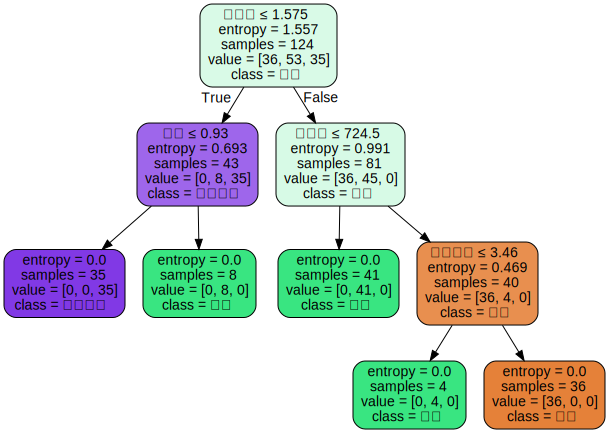

In [8]:
graph

**6. 探索决策树**

In [11]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42991932, 0.        , 0.        , 0.09715165,
       0.1543487 , 0.        , 0.31858033])

In [15]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰碱', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.42991932278215383),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.09715165083645111),
 ('色调', 0.15434869554547562),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.31858033083591936)]

**7. 剪枝策略**

对训练集的拟合程度

In [25]:
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

+ **max_depth**

在集成算法中也非常实用，在实际中建议从n=3开始尝试

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=0
                                 ,max_depth=3
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)  # 返回预测的准确度

dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=['琴酒','雪莉','贝尔摩德']
                               ,filled=True
                               ,rounded=True
                               ,special_characters='utf-8'
                               )

graph = graphviz.Source(dot_data)

graph

0.9259259259259259

+ **min_samples_leaf或者min_samples_split**

min_samples_leaf用于限制叶子节点最少具有几个样本；min_samples_split限制需要分裂的中间节点最少具有几个样本

一般会搭配max_depth实用，使模型平滑。参数设置太小，容易引起过拟合；设置太大，会阻止模型学习，一般从n=5开始尝试。叶子节点在训练集和测试集中包含的样本量差距较大时，一般用浮点数作为百分比。对于类别不多的情况，n=1就是最佳选择

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                 ,random_state=0
                                 ,min_samples_leaf=1
                                 )
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)  # 返回预测的准确度

dot_data = tree.export_graphviz(clf
                               ,feature_names=feature_name
                               ,class_names=['琴酒','雪莉','贝尔摩德']
                               ,filled=True
                               ,rounded=True
                               ,special_characters='utf-8'
                               )

graph = graphviz.Source(dot_data)

graph

0.9259259259259259

+ **max_features或者min_impurity_decrease**

max_features限制可用的特征数量，由于比较简单粗暴，很少用，一般会用PCA等方法对高维数据降维

+ **确认最优的剪枝曲线**

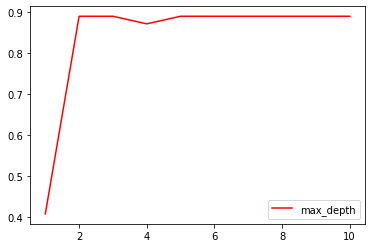

In [39]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion='entropy'
                                     ,random_state=0
                                     ,splitter='random'
                                     ,max_depth=i+1
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)

plt.plot(range(1,11), test, color='red', label='max_depth')
plt.legend()
plt.show()

思考：

1.那么多特征和参数，挨个画曲线吗？

2.剪枝曲线一定能提升在测试集上的表现吗？-----不一定，调参没有绝对的答案，一切看数据本身

**8. 目标权重参数**

+ **class_weight与min_weight_fraction_leaf**

用于完成样本不均衡的情况

**9. 重要属性和接口**

In [41]:
# 对应的数据所有的叶子节点的索引
clf.apply(Xtrain)

array([ 6,  6,  2, 10,  2,  2,  2,  2,  6,  6, 15, 15, 15,  2,  2, 15,  3,
        2, 15,  2,  8, 15,  2,  2,  2, 18,  3,  8, 18,  2, 15,  6, 18,  6,
       13,  6,  2,  2,  6,  6,  2, 15,  6,  2,  3,  2,  6,  6,  8,  3, 13,
       18, 15,  3,  6,  2,  6,  6,  2,  3,  8,  2, 15,  6,  6,  3,  6, 15,
        8,  2,  2, 15, 15, 11,  2,  8,  3,  2,  3,  3, 17, 15, 15,  3,  6,
        6,  6,  2,  2, 18, 10,  2,  6,  2,  2, 15,  6,  6, 15, 15, 15, 15,
       15,  8,  3, 18, 15, 15, 15, 15, 15, 15, 18,  2,  6, 11,  2,  3,  2,
        6,  6,  3,  2,  2], dtype=int64)

In [42]:
# 预测类别
clf.predict(Xtrain)

array([1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 1, 0,
       2, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 2])

**10. 实例：分类树在红酒数据集上的表现**

以上在红酒数据集上画一棵树，并展示了修改多个参数会对树形成这样的影响。接下来展示在不同的数据集上决策树的效果，让大家更好地理解决策树。

**导入数据**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.tree import DecisionTreeClassifier

In [17]:
import pandas as pd
import seaborn as sns

**生成三种数据集**
1. 月亮型数据
2. 环形数
3. 二分型数据

In [32]:
# make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
                           n_features=2,  #包含2个特征，即生成二维数据
                           n_redundant=0, #添加冗余特征0个
                           n_informative=2, #包含信息的特征是2个
                           random_state=1,  #随机模式1
                           n_clusters_per_class=1 #每个簇内包含的标签类别有1个
                          )

In [21]:
X.shape

(100, 2)

In [22]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [24]:
df = pd.DataFrame({'cola': X[:,0], 'colb':X[:,1], 'y':y})
df.head()

,cola,colb,y
0,-1.049486,0.878644,1
1,0.878099,0.895511,0
2,0.959288,1.039673,0
3,-1.180134,1.120622,1
4,-0.907318,1.060409,1


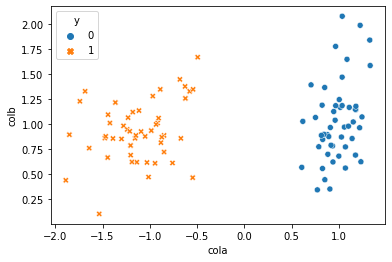

In [26]:
# seaborn作图
sns.scatterplot(x='cola', y='colb', hue='y', style='y', data=df)
plt.show()

可以看到二分型的数据距离比较远，不利于测试分类器的效果，因此用np随机生成数组，通过让已经生成的二分型数据点加减0-1之间的随机数，使数据变得稀疏

In [33]:
rng = np.random.RandomState(2)  # 生成一种随机模式
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

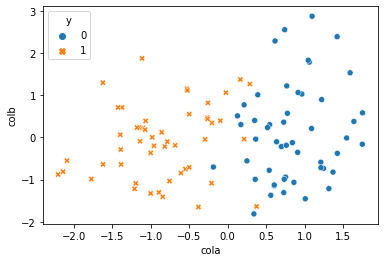

In [52]:
df2 = pd.DataFrame({'cola': X[:,0], 'colb':X[:,1], 'y':y})
sns.scatterplot(x='cola', y='colb', hue='y', style='y', data=df2)
plt.show()

这个过程只能进行一次，多次进行后，数据会混合得非常严重，导致分类器性能下降

In [69]:
# 用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

In [63]:
# df_moon = pd.DataFrame({'cola': datasets[0][0][:,0], 'colb':datasets[0][0][:,1], 'y':datasets[0][1]})
# sns.scatterplot(x='cola', y='colb', hue='y', style='y', data=df_moon)
# plt.show()

In [64]:
# df_circle = pd.DataFrame({'cola': datasets[1][0][:,0], 'colb':datasets[1][0][:,1], 'y':datasets[1][1]})
# sns.scatterplot(x='cola', y='colb', hue='y', style='y', data=df_circle)
# plt.show()

**创建三种数据集以及决策树在对应的数据集上的分类表现**

(28, 25)
(27, 25)
(29, 25)


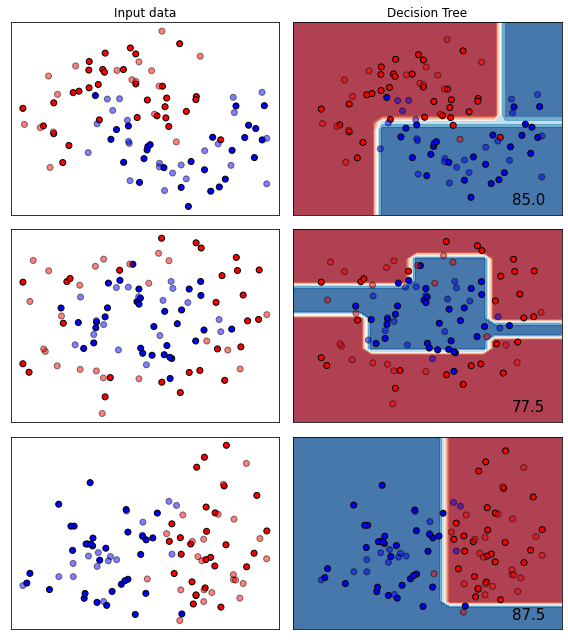

In [81]:
fig = plt.figure(figsize=(8, 9))                            
  
i = 1
for ds_index, ds in enumerate(datasets):
    # 对数据进行标准化处理, 划分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=33)
    
    # 对两个特征分别找稍大和稍小的数框住
    x1_min, x1_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    x2_min, x2_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5 
    
    # 生成网格
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),  np.arange(x2_min, x2_max, 0.2))
    
    # 设置好正负样本要映射的颜色
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax = plt.subplot(3, 2, i)
    
    if ds_index == 0:
        ax.set_title('Input data')

    # 先放训练集
    ax.scatter(X_train[:, 0], X_train[:,1], c=Y_train, cmap=cm_bright, edgecolors='k')
    # 再放测试集
    ax.scatter(X_test[:, 0], X_test[:,1], c=Y_test, alpha=0.5, cmap=cm_bright, edgecolors='k')
    # 设置边框
    ax.set_xticks(())
    ax.set_yticks(())
    
    # 每次循环之后让图位于不同的行
    i += 1
    
    ############################ 左侧数据集的图已经画好 ######################################
    ax = plt.subplot(3, 2, i)
    
    # 决策树建模
    clf = DecisionTreeClassifier(max_depth=5)
    clf = clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    
    # 绘制决策边界,为此需要将网格中的每个点映射到一种颜色
    # 调用分类数据的接口， predict_proba返回每个数据对应的标签概率
    # 由于决策树在训练时导入的数据有两个特征，所以在计算类概率时必须用相同的结构，即也要输入两个特征
    # ravel()可以将一个多维数组转换为一维数组
    # np.c_可以将两个数组结合起来
    # 先把两个网格数据降维成一维
    Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:,1]
    # 返回的概率作为数据
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=0.8)
    
    
    if ds_index == 0:
        ax.set_title('Decision Tree')
    # 先放训练集
    ax.scatter(X_train[:, 0], X_train[:,1], c=Y_train, cmap=cm_bright, edgecolors='k')
    # 再放测试集
    ax.scatter(X_test[:, 0], X_test[:,1], c=Y_test, alpha=0.5, cmap=cm_bright, edgecolors='k')
    # 设置边框
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.text(array1.max()-0.3, array2.min()+0.3, '%.1f'%(score*100), size=15, horizontalalignment='right')
        
    i += 1
 

plt.tight_layout()
plt.show()   
    

可以看出，决策树天生不适合处理环形数据，每个模型都有自己的决策上限，所以一个模型如何调参都无法提高表现是可能的。当一个模型怎么调整都不行的时候，我们可以选择换其他的模型使用。

顺便说明，最擅长月亮型数据的是最近邻算法，RBF支持向量化和高斯过程；最擅长环形数据的似乎最近邻算法和高斯过程；最擅长对半分数据的朴素贝叶斯、随机森林和神经网络。